# Graduate School Case Study

In [60]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn

# EDA

In [61]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


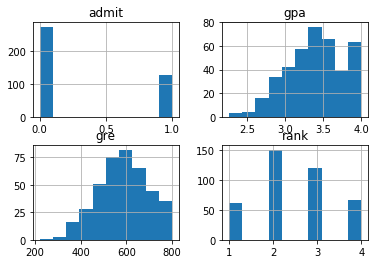

In [64]:
df.hist();

In [65]:
# class imbalance
df.admit.sum() / 400, (df.admit.size - df.admit.sum()) / 400

(0.3175, 0.6825)

In [66]:
# more admitting when rake 1 school vs rank 3 or 4
pd.crosstab(df['admit'], df['rank'], rownames=['admit'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


# Split and Scale

In [67]:
y = df.pop('admit')
X = df

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
# If not scaling ...
# Convergence Warning: The max_iter was reached which means the coef_ did not converge
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [69]:
print('\n'.join(sklearn.metrics.SCORERS.keys()))

explained_variance
r2
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
accuracy
roc_auc
balanced_accuracy
average_precision
neg_log_loss
brier_score_loss
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted


# Gridsearch

In [70]:
params = {
          'penalty': ['l2'], 
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.2230... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

# Results

In [72]:
gs.best_estimator_

LogisticRegression(C=0.0517947467923121, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

# Final Model

In [79]:
gs.best_params_

{'C': 0.0517947467923121,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'sag'}

In [82]:
model = LogisticRegression(**gs.best_params_).fit(X_train, y_train)

In [87]:
y_hat = model.predict(X_test)
p_hat = model.predict_proba(X_test)[:,1]

In [89]:
log_loss(y_test, p_hat)

0.5401279896535521

In [96]:
baseline = 1 - (y_test.sum() / y_test.size)
accuracy = accuracy_score(y_test, y_hat)
baseline, accuracy

(0.7424242424242424, 0.75)

In [97]:
# TP / (TP + FP) # type 1 errors
precision_score(y_test, y_hat)

0.5555555555555556

In [98]:
# TP / (TP + FN) # type 2 errors --- focus on increasing this number
recall_score(y_test, y_hat)

0.14705882352941177

# ROC Curve

In [99]:
auc = roc_auc_score(y_test, p_hat)
auc

0.693577430972389

In [100]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

1.60 0.00 0.00
0.60 0.01 0.00
0.56 0.01 0.06
0.55 0.02 0.06
0.55 0.02 0.09
0.54 0.03 0.09
0.51 0.03 0.12
0.51 0.04 0.12
0.51 0.04 0.15
0.50 0.05 0.15
0.45 0.05 0.38
0.44 0.07 0.38
0.43 0.07 0.47
0.41 0.16 0.47
0.40 0.16 0.50
0.40 0.18 0.50
0.40 0.18 0.53
0.40 0.19 0.53
0.39 0.19 0.59
0.39 0.21 0.59
0.39 0.21 0.62
0.37 0.31 0.62
0.36 0.31 0.65
0.31 0.51 0.65
0.30 0.51 0.68
0.28 0.57 0.68
0.28 0.57 0.71
0.27 0.64 0.71
0.27 0.64 0.74
0.26 0.66 0.74
0.26 0.66 0.76
0.26 0.68 0.76
0.26 0.68 0.79
0.25 0.70 0.79
0.24 0.70 0.85
0.22 0.74 0.85
0.22 0.74 0.91
0.21 0.77 0.91
0.21 0.77 0.94
0.21 0.79 0.94
0.21 0.79 0.97
0.17 0.91 0.97
0.17 0.91 1.00
0.10 1.00 1.00


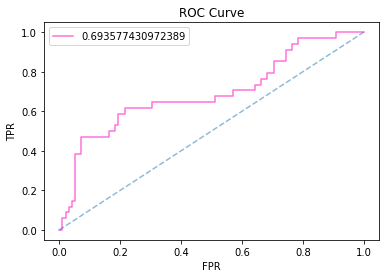

In [101]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()